<a href="https://colab.research.google.com/github/prahladpunia/AI/blob/main/NLP_EMBEDDING_BIDIRECTIONAL_LSTM_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [22]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /content/drive/MyDrive/IRIS/irish-lyrics-eof.txt

--2022-04-07 05:21:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c0b::80, 2607:f8b0:4023:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/content/drive/MyDrive/IRIS/irish-lyrics-eof.txt’

/content/drive/MyDr 100%[===================>]  67.35K  --.-KB/s    in 0.004s  

2022-04-07 05:21:30 (16.6 MB/s) - ‘/content/drive/MyDrive/IRIS/irish-lyrics-eof.txt’ saved [68970/68970]



In [23]:
tokenizer = Tokenizer()

In [24]:
data = open('/content/drive/MyDrive/IRIS/irish-lyrics-eof.txt').read()

In [25]:
corpus = data.lower().split("\n")

In [26]:
tokenizer.fit_on_texts(corpus)
word_index= tokenizer.word_index

In [27]:
total_words = len(word_index)+1
total_words

2690

In [28]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence=token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [29]:
#pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre")
input_sequences = np.array(input_sequences)

In [30]:
# create predictors and label
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

ys= tf.keras.utils.to_categorical(labels, num_classes= total_words)

In [31]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [32]:
print(xs[6]),print(ys[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0. 0. 0. ... 0. 0. 0.]


(None, None)

In [33]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [34]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [35]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [37]:
model= Sequential()
model.add(Embedding(total_words, 100, input_length= max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation="softmax"))
adam = Adam(learning_rate=0.01)

In [42]:
model.summary()
print(model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 100)           269000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              301200    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 2690)              809690    
                                                                 
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics=["accuracy"])

In [ ]:
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

In [43]:
history = model.fit(xs, ys, epochs=100, verbose=1)


Epoch 1/100
377/377 [==============================] - 25s 56ms/step - loss: 6.6304 - accuracy: 0.0777
Epoch 2/100
377/377 [==============================] - 22s 57ms/step - loss: 5.7205 - accuracy: 0.1160
Epoch 3/100
377/377 [==============================] - 21s 57ms/step - loss: 4.7993 - accuracy: 0.1712
Epoch 4/100
377/377 [==============================] - 21s 57ms/step - loss: 3.8402 - accuracy: 0.2494
Epoch 5/100
377/377 [==============================] - 22s 57ms/step - loss: 3.0210 - accuracy: 0.3530
Epoch 6/100
377/377 [==============================] - 21s 57ms/step - loss: 2.3575 - accuracy: 0.4618
Epoch 7/100
377/377 [==============================] - 22s 60ms/step - loss: 1.9037 - accuracy: 0.5498
Epoch 8/100
377/377 [==============================] - 22s 58ms/step - loss: 1.6269 - accuracy: 0.6114
Epoch 9/100
377/377 [==============================] - 22s 58ms/step - loss: 1.3785 - accuracy: 0.6656
Epoch 10/100
377/377 [==============================] - 22s 58ms/step - l

In [44]:
import matplotlib.pyplot as plt

In [47]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

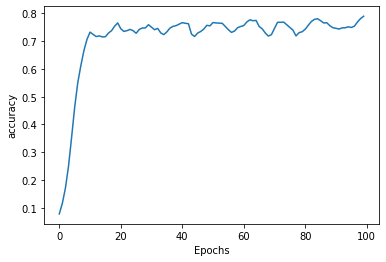

In [48]:
plot_graphs(history, 'accuracy')

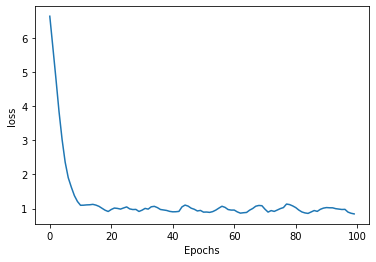

In [49]:
plot_graphs(history, 'loss')

In [52]:
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted.any:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this                                                                                                    
